In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/admin/Desktop/telecom_churn.csv")

In [3]:
df = pd.get_dummies(df, columns=['Income']) 
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Income_High,Income_Low,Income_Medium
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,1,0,0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0,0,1
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0,1,0
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0,1,0
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,1,0,0


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,classification_report, recall_score, accuracy_score,confusion_matrix, f1_score, roc_auc_score,roc_curve,auc

In [5]:
y=df['Churn']
X=df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Income_High', 'Income_Low', 'Income_Medium']]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [10]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred= logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[559  19]
 [ 73  16]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       578
           1       0.46      0.18      0.26        89

    accuracy                           0.86       667
   macro avg       0.67      0.57      0.59       667
weighted avg       0.83      0.86      0.84       667

0.8620689655172413


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Grid Search

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


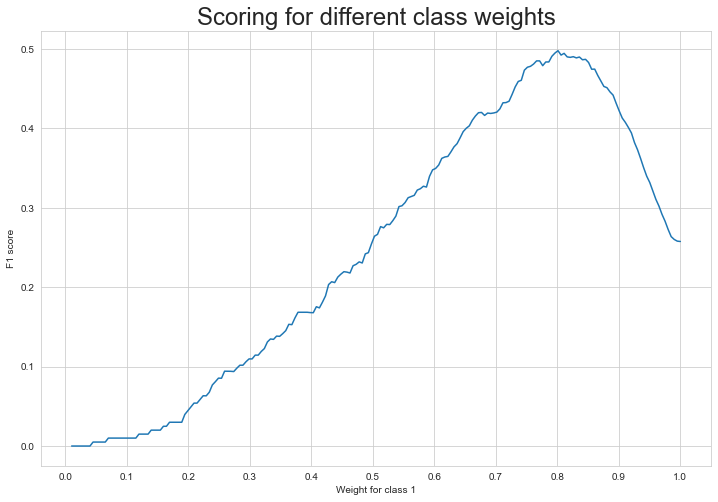

In [16]:
lr=LogisticRegression(solver='newton-cg')
w = np.linspace(0.0,0.99,200)
p_grid = {'class_weight': [{0:x,1:1.0-x} for x in w]}
gridsearch= GridSearchCV(estimator=lr,param_grid= p_grid,cv= StratifiedKFold(), n_jobs=-1,scoring='f1',verbose=2).fit(X_train,y_train)
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- w)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)
plt.show()

###Class 1 has the best F1 score at 0.8 weight. 

In [21]:
lr= LogisticRegression(solver='newton-cg',class_weight={0:0.2,1:0.8})
lr.fit(X_train,y_train)
pred_test= lr.predict(X_test)
confusion_matrix(y_test,pred_test)
print(f'Accuracy Score: {accuracy_score(y_test,pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred_test)}')
print(f'Recall score: {recall_score(y_test,pred_test)}')
print(f'F1Score:{f1_score(y_test,pred_test)}')

Accuracy Score: 0.8350824587706147
Confusion Matrix: 
[[492  86]
 [ 24  65]]
Area Under Curve: 0.7907740756580226
Recall score: 0.7303370786516854
F1Score:0.5416666666666666


## Handling the imbalanced dataset

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [30]:
over=SMOTE(sampling_strategy=0.50,random_state=42)
under = RandomUnderSampler(sampling_strategy=0.7,random_state=42)

In [32]:
X_res, y_res = over.fit_resample(X_train, y_train)
X_res, y_res = under.fit_resample(X_res, y_res)

In [33]:
one=np.sum(y_res)
zero=len(y_res)-np.sum(y_res)
print(one)
print(zero)
print(one/zero)

1136
1622
0.7003699136868065


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


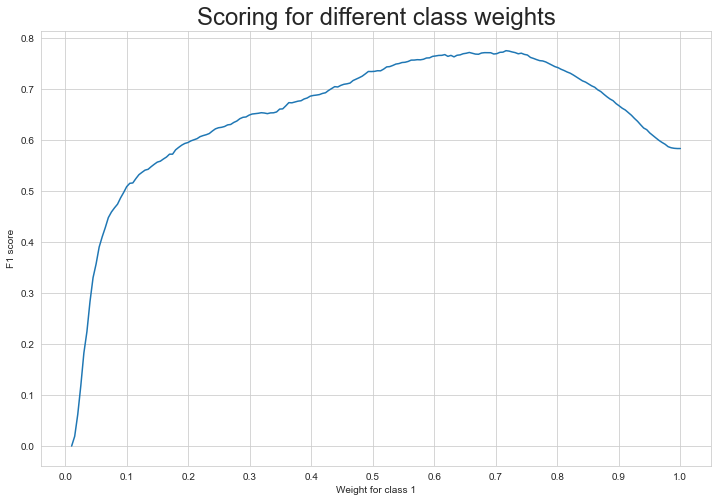

In [34]:
lr=LogisticRegression(solver='newton-cg')
w = np.linspace(0.0,0.99,200)
p_grid = {'class_weight': [{0:x,1:1.0-x} for x in w]}
gridsearch= GridSearchCV(estimator=lr,param_grid= p_grid,cv= StratifiedKFold(), n_jobs=-1,scoring='f1',verbose=2).fit(X_res,y_res)
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- w)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)
plt.show()

###Class 1 has the best F1 score at 0.65 weight. 

In [35]:
lr= LogisticRegression(solver='newton-cg',class_weight={0:0.2,1:0.71})
lr.fit(X_train,y_train)
pred_test= lr.predict(X_test)
confusion_matrix(y_test,pred_test)
print(f'Accuracy Score: {accuracy_score(y_test,pred_test)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, pred_test)}')
print(f'Recall score: {recall_score(y_test,pred_test)}')
print(f'F1Score:{f1_score(y_test,pred_test)}')

Accuracy Score: 0.8245877061469266
Confusion Matrix: 
[[493  85]
 [ 32  57]]
Area Under Curve: 0.7466953073364176
Recall score: 0.6404494382022472
F1Score:0.49350649350649345
